### Impact Hour Debt

Number of impact hours

Total amount raised. This is the parameter sweep.

For x amount raised, how many impact hours are there?

What is your target raise amount?

What will our minimum tribute goal be?

These are our total impact hours for every round. 

This is after round 6:   
2089 impact hours so far.    
8240 Hours projected if we launch in    

In [116]:
import pandas as pd
import os
import hvplot.pandas
APP_PATH = './'

#### One way of doing it:

In [117]:
sheets = [
    "Total Impact Hours so far", 
    "IH Predictions", 
    "#8 Jan 1",
    "#7 Dec 18",
    "#6 Dec 4",
    "#5 Nov 20",
    "#4 Nov 6",
    "#3 Oct 23",
    "#2 Oct 9",
    "#1 Sept 24",
    "#0 Sept 7 (historic)",
] + [f"#{i} IH Results" for i in range(9)]
sheets = {i:sheet for i, sheet in enumerate(sheets)}

def read_excel(sheet_name="Total Impact Hours so far", header=1, index_col=0, usecols=None) -> pd.DataFrame:
    data = pd.read_excel(
        os.path.join(APP_PATH, "data", "TEC Praise Quantification.xlsx"),
        sheet_name=sheet_name,
        engine='openpyxl',
        header=header,
        index_col=index_col,
        usecols=usecols
    ).reset_index().dropna(how='any')
    return data

## Tests
total_impact_hours = read_excel()
impact_hour_data = read_excel(sheet_name="IH Predictions", header=0, index_col=0, usecols='A:I').drop(index=19)

#### Another way of doing it:

In [157]:
data = pd.read_csv('data/IHPredictions.csv').query('Model=="Historic"')
optimistic_data = pd.read_csv('data/IHPredictions.csv').query('Model=="Optimistic"')

ih_cumulative_curve = data.hvplot(x='End Date', y='Total IH', rot=45, title='Impact Hours Accumulation Curve :)')

ih_bar = data.hvplot.bar(x='End Date', y='Total Hours', label='Actual')

predicted_ih_cumulative_curve = data[data["Actual / Predicted"] == "Predicted"].hvplot(x='End Date', y='Total IH', rot=45, title='Impact Hours Accumulation Curve :)')

predicted_ih_bar = data[data["Actual / Predicted"] == "Predicted"].hvplot.bar(x='End Date', y='Total Hours', label='Predicted')

optimistic_ih_curve = optimistic_data[optimistic_data["Actual / Predicted"] == "Predicted"].hvplot(x='End Date', y='Total IH')

optimistic_ih_bars = optimistic_data[optimistic_data["Actual / Predicted"] == "Predicted"].hvplot.bar(x='End Date', y='Total Hours', label='Optimistic')

ih_cumulative_curve * ih_bar * predicted_ih_cumulative_curve * predicted_ih_bar * optimistic_ih_curve * optimistic_ih_bars

:Overlay
   .Curve.I         :Curve   [End Date]   (Total IH)
   .Bars.Actual     :Bars   [End Date]   (Total Hours)
   .Curve.II        :Curve   [End Date]   (Total IH)
   .Bars.Predicted  :Bars   [End Date]   (Total Hours)
   .Curve.III       :Curve   [End Date]   (Total IH)
   .Bars.Optimistic :Bars   [End Date]   (Total Hours)

#### Total Impact Hours by Person

In [158]:
total_impact_hours = read_excel()

In [161]:
total_impact_hours.head(10)

,Telegram Handle,Impact Hours
0,sembrestels,233.570354
1,santigs67,207.412308
2,zeptimusq,160.483885
3,cranders71,135.760369
4,akrtws,131.120931
5,ygganderson,118.492533
6,solsista,110.589051
7,jessicazartler,97.402874
8,tonga2020,84.544837
9,juankbell,76.912622


In [192]:
total_impact_hours.hvplot.hist(y='Impact Hours', bins=100, title="Impact Hours Distribution")

:Histogram   [Impact Hours]   (Impact Hours_count)

In [193]:
total_impact_hours['norm'] = total_impact_hours['Impact Hours'] / total_impact_hours['Impact Hours'].sum()
total_impact_hours.hvplot.hist(y='norm', bins=50, title="Impact Hours Distribution Normalized") * total_impact_hours.hvplot.density(y='norm', xlim=(0, None)) 

:Overlay
   .Histogram.I    :Histogram   [norm]   (norm_count)
   .Distribution.I :Distribution   [norm]   (Density)

In [199]:
total_impact_hours[total_impact_hours['Impact Hours'] < 40].hvplot.hist(y='Impact Hours')

:Histogram   [Impact Hours]   (Impact Hours_count)

In [200]:
total_impact_hours[total_impact_hours['Impact Hours'] > 40].hvplot.hist(y='Impact Hours')

:Histogram   [Impact Hours]   (Impact Hours_count)

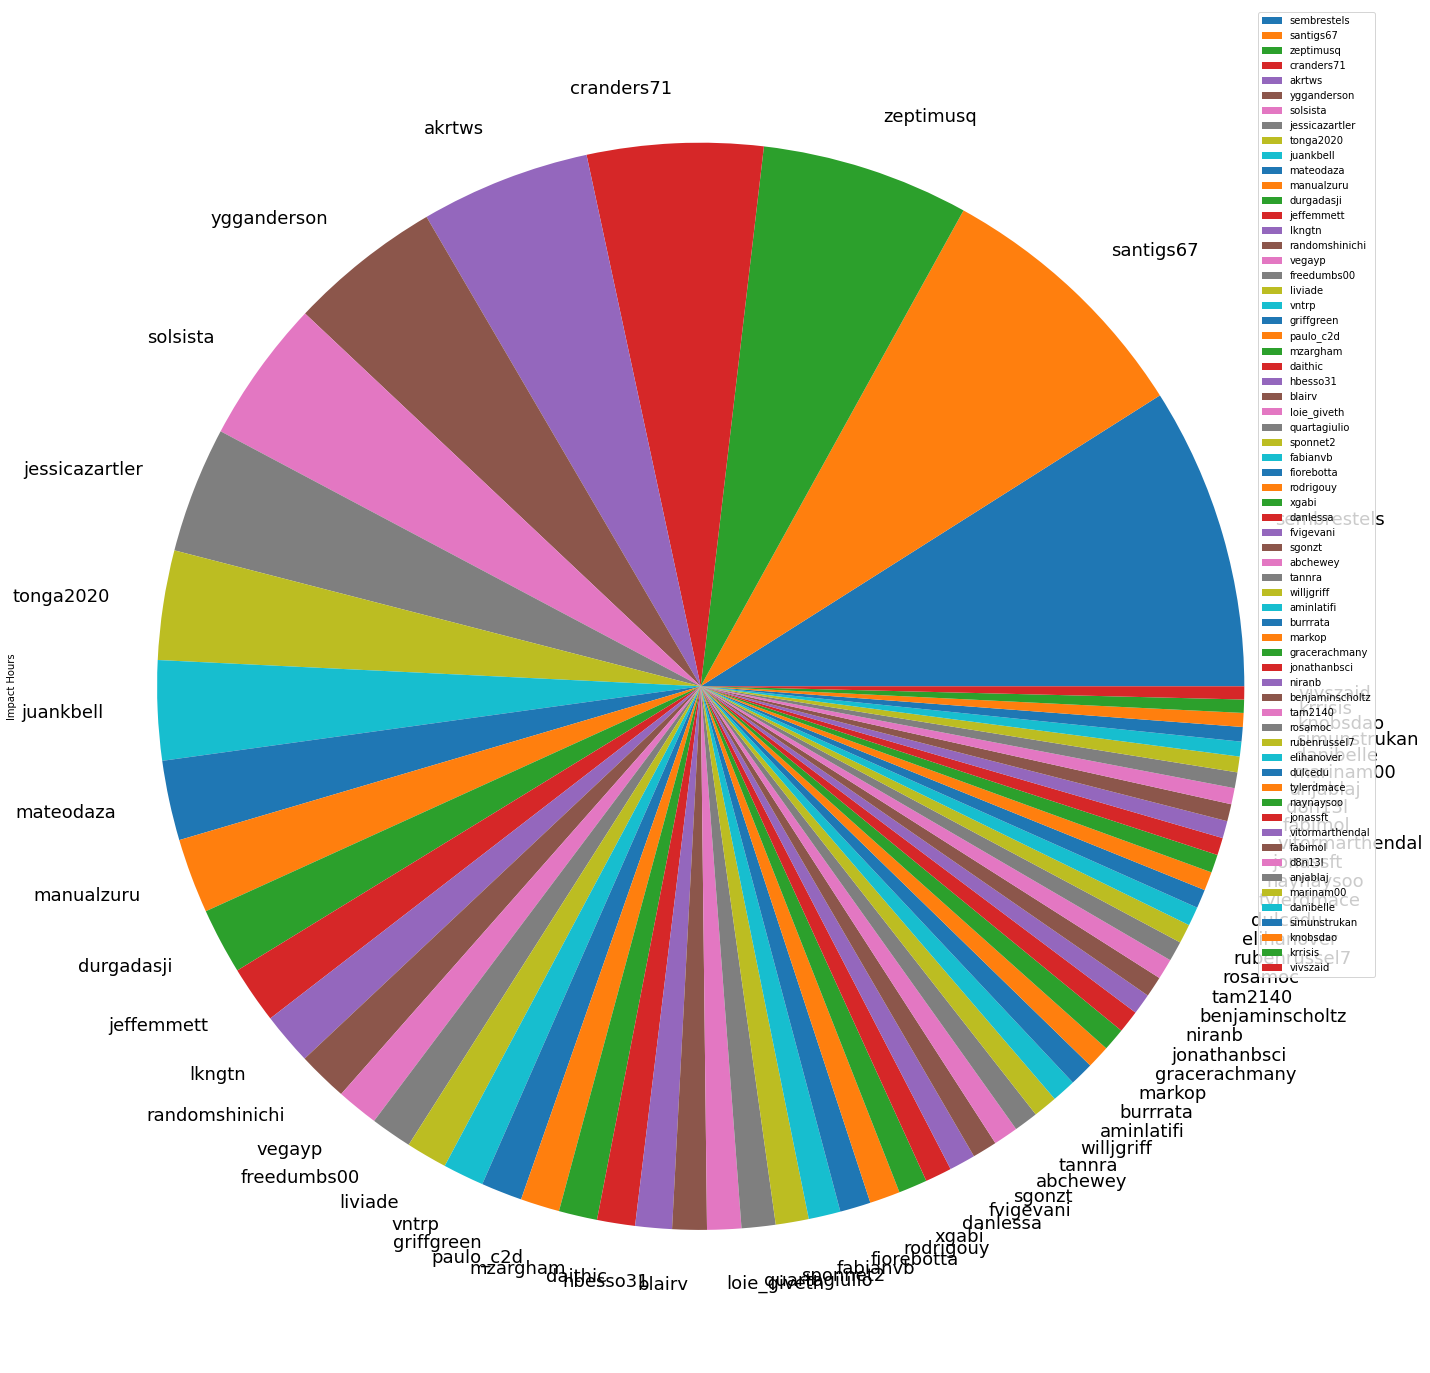

In [217]:
p = total_impact_hours[total_impact_hours['Impact Hours'] > 10].set_index('Telegram Handle').plot.pie(y='Impact Hours', figsize=(25, 25), fontsize=18).get_figure()

In [218]:
p.savefig("Pie.pdf")

In [179]:
total_impact_hours.hvplot.density

Signature:
total_impact_hours.hvplot.density(
    y=None,
    by=None,
    *,
    alpha,
    color,
    fill_alpha,
    fill_color,
    hover_alpha,
    hover_color,
    hover_fill_alpha,
    hover_fill_color,
    hover_line_alpha,
    hover_line_color,
    line_alpha,
    line_cap,
    line_color,
    line_dash,
    line_join,
    line_width,
    muted,
    muted_alpha,
    muted_color,
    muted_fill_alpha,
    muted_fill_color,
    muted_line_alpha,
    muted_line_color,
    nonselection_alpha,
    nonselection_color,
    nonselection_fill_alpha,
    nonselection_fill_color,
    nonselection_line_alpha,
    nonselection_line_color,
    selection_alpha,
    selection_color,
    selection_fill_alpha,
    selection_fill_color,
    selection_line_alpha,
    selection_line_color,
    visible,
    width,
    height,
    shared_axes,
    grid,
    legend,
    rot,
    xlim,
    ylim,
    xticks,
    yticks,
    colorbar,
    invert,
    title,
    logx,
    logy,
    loglog,
    xaxis,
   

In [162]:
total_impact_hours.describe()

,Impact Hours
count,199.000000
mean,14.539026
std,32.020375
min,0.019669
25%,0.741325
50%,2.724344
75%,14.591435
max,233.570354


In [ ]:
for i in range(9):
    sheet = f"#{i} IH Results"
    

In [50]:
total_impact_hours = total_impact_hours.reset_index().dropna(how='any')

In [51]:
total_impact_hours['Impact Hours'].sum()

2893.26608161608

In [53]:
total_impact_hours

,Impact Hours
Telegram Handle,
sembrestels,233.570354
santigs67,207.412308
zeptimusq,160.483885
cranders71,135.760369
akrtws,131.120931
...,...
NaN,NaN
NaN,NaN
NaN,NaN


In [ ]:
IH_predictions = pd.read_excel(
)